WeatherPy

Generate City list

In [1]:
#Load Dependencies
import os
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from urllib.error import HTTPError
from citipy import citipy

#Get API keys needed
#Openweathermap.org API key
weatherkey=os.environ.get('key1')

#Output file for results of today's city weather
output='cities_weather_'+str(datetime.date.today().strftime("%m_%d_%Y"))+'.csv'

#Create 1500 random lat-lon combos for potential cities
lat=np.random.uniform(low=-90.0, high=90.0, size=1500)
long=np.random.uniform(low=-180.0, high=180.0, size=1500)
tcities=pd.DataFrame({
    'lat':lat,
    'long':long})
tcities['city']=''

#Identify city nearest each lat/lng combo and create city list of at least 500 unique cities
for index, row in tcities.iterrows():
    tcities.loc[index,'city']=citipy.nearest_city(tcities.loc[index,'lat'],tcities.loc[index,'long']).city_name
    tcities.loc[index,'country']=citipy.nearest_city(tcities.loc[index,'lat'],tcities.loc[index,'long']).country_code
    tcities.loc[index,'lookup']=tcities.loc[index,'city']+','+tcities.loc[index,'country']

cities=tcities.drop_duplicates(subset=['lookup'])
cities.reset_index(drop=True, inplace=True)

#Check city count
numcities=len(cities)
print (f'Weather needed for {numcities} cities')

Weather needed for 613 cities


Get Weather For At Least 500 Cities Via API

In [2]:
#Get the weather for at least 500 random cities via Openweathermap.org API
settings={'units':'imperial', 'appid':weatherkey}

count=0
for index, row in cities.iterrows():
    try:
        response=owm.get_current(cities.loc[index,'lookup'], **settings)
        cities.loc[index,'temp']=response('main.temp')
        cities.loc[index,'hum']=response('main.humidity')
        cities.loc[index,'wind']=response('wind.speed')
        cities.loc[index,'cloud']=response('clouds.all')
        cities.loc[index,'name']=f'{response("name")}, {response("sys.country")}'
        print(f'City weather found for {cities.loc[index,"lookup"]}, City Id: {response("id")}')
        time.sleep(1.01)
    except HTTPError:
        print(f'City weather NOT AVAILABLE for {cities.loc[index,"lookup"]}')
        count+=1
        time.sleep(1.01)
        
print(f'Weather not found for {count} cities of the {numcities} cities searched.')

C:\Users\phili\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\phili\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


City weather found for sitka,us, City Id: 4267710
City weather found for puerto el triunfo,sv, City Id: 3584003
City weather found for avarua,ck, City Id: 4035715
City weather found for adrar,dz, City Id: 2508813
City weather NOT AVAILABLE for samusu,ws
City weather found for carnarvon,au, City Id: 2074865
City weather found for agutaya,ph, City Id: 1731798
City weather found for bulgan,mn, City Id: 2032201
City weather found for george,za, City Id: 1002145
City weather found for nisia floresta,br, City Id: 3393922
City weather found for busselton,au, City Id: 2075265
City weather found for saldanha,za, City Id: 3361934
City weather found for thompson,ca, City Id: 6165406
City weather found for tuktoyaktuk,ca, City Id: 6170031
City weather found for cochrane,ca, City Id: 5924618
City weather found for east london,za, City Id: 1006984
City weather found for tecoanapa,mx, City Id: 3532499
City weather found for vaini,to, City Id: 4032243
City weather found for belaya gora,ru, City Id: 21

Create Data File And Plots Of Data For The Cities

In [3]:
#Create a csv file containing the 500+ cities and today's weather
cities.to_csv(output, index=False, header=True)

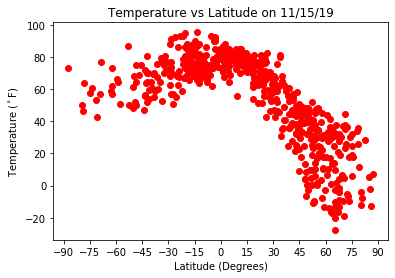

In [4]:
# Generate and Save Temperature vs Latitude Plot
plt.scatter(cities['lat'],cities['temp'],marker='o',c='red')
plt.title(f'Temperature vs Latitude on {datetime.date.today().strftime("%x")}')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Temperature ($^\circ$F)')
plt.xticks([-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90])

plt.savefig('analysis/temperature.jpg')

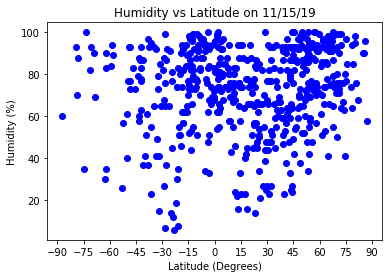

In [5]:
# Generate and Save Humidity vs Latitude Plot
plt.scatter(cities['lat'],cities['hum'],marker='o',c='blue')
plt.title(f'Humidity vs Latitude on {datetime.date.today().strftime("%x")}')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (%)')
plt.xticks([-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90])

plt.savefig('analysis/humidity.jpg')

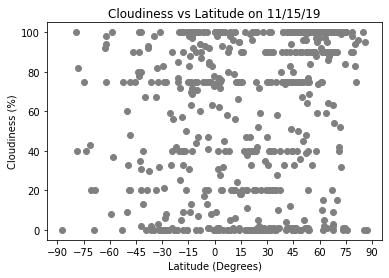

In [6]:
# Generate and Save Cloudiness vs Latitude Plot
plt.scatter(cities['lat'],cities['cloud'],marker='o',c='gray')
plt.title(f'Cloudiness vs Latitude on {datetime.date.today().strftime("%x")}')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness (%)')
plt.xticks([-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90])

plt.savefig('analysis/cloudiness.jpg')

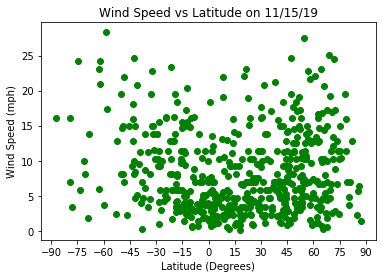

In [7]:
# Generate and Save Wind Speed vs Latitude Plot
plt.scatter(cities['lat'],cities['wind'],marker='o',c='green')
plt.title(f'Wind Speed vs Latitude on {datetime.date.today().strftime("%x")}')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (mph)')
plt.xticks([-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90])

plt.savefig('analysis/wind.jpg')